<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Parsa Hatami

**Student ID**: 400100962





## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [18]:
X, Y = None, None

### START CODE HERE ###
# Load the data
df = pd.read_csv('Q3\data2_logistic.csv')

# Extract features
X = df[['X1', 'X2', 'X3']].values

# Extract target
Y = df['Y'].values
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**: 

1. **Scale**: Features in our dataset may be measured in different units, which means they can vary in scale. For example, one feature might range between 0 and 1, while another feature might range between 0 and 1000. Algorithms that use distance measures, like k-nearest neighbors (KNN), or that use gradient descent to optimize a cost function, like linear regression or neural networks, can be sensitive to the scale of the features. Normalizing ensures all features have the same scale.

2. **Distribution**: Many machine learning algorithms assume that the input data is normally distributed, or at least that all the features in your dataset are on the same scale. This can improve the performance of the model.

3. **Numerical Stability**: Machine learning algorithms use numerical optimization techniques that can have issues when the scale is not normalized. For example, in the case of gradient descent, if one feature in the input data has a broad range of values, the steps of the gradient descent can be very large in this dimension, which can lead to instability in the learning process.

4. **Speed of Learning**: Normalization can also speed up the learning process, as it can help the optimization algorithm converge more quickly.

In [19]:
### START CODE HERE ###

Xmean = np.mean(X, axis=0)
XVar = np.var(X, axis=0)
X = (X - Xmean) / np.sqrt(XVar)

print(X.shape)
X
### END CODE HERE ###

(10000, 3)


array([[-0.39714618, -0.18621464,  1.39965469],
       [-1.3868325 ,  1.67490288,  0.07882144],
       [-1.586014  ,  0.01701852,  1.68421286],
       ...,
       [ 1.21234373, -0.6976976 , -0.23041219],
       [-1.63773518, -1.45952669, -0.16400986],
       [ 1.37890723, -1.17682691, -0.87444258]])

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [20]:
### START CODE HERE ###

X = np.insert(X, 0, 1, axis=1)
print(X.shape)
### END CODE HERE ###

print(X.shape)
X

(10000, 4)
(10000, 4)


array([[ 1.        , -0.39714618, -0.18621464,  1.39965469],
       [ 1.        , -1.3868325 ,  1.67490288,  0.07882144],
       [ 1.        , -1.586014  ,  0.01701852,  1.68421286],
       ...,
       [ 1.        ,  1.21234373, -0.6976976 , -0.23041219],
       [ 1.        , -1.63773518, -1.45952669, -0.16400986],
       [ 1.        ,  1.37890723, -1.17682691, -0.87444258]])

## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [24]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    return 1 / (1 + np.exp(-Z))

testVector = np.array([0, 1, 2, 3])
testMatrix = np.array([[0, 1, 2, 3], [4, 5, 6, 7]])
testVectorResult = sigmoid(testVector)
testMatrixResult = sigmoid(testMatrix)
print("Test Vector: \n", testVector)
print("Test Matrix: \n", testMatrix)
print("Sigmoid on vector: \n", testVectorResult)
print("Sigmoid on matrix: \n", testMatrixResult)

Test Vector: 
 [0 1 2 3]
Test Matrix: 
 [[0 1 2 3]
 [4 5 6 7]]
Sigmoid on vector: 
 [0.5        0.73105858 0.88079708 0.95257413]
Sigmoid on matrix: 
 [[0.5        0.73105858 0.88079708 0.95257413]
 [0.98201379 0.99330715 0.99752738 0.99908895]]


### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [34]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    h = sigmoid(np.dot(X, theta))
    loss = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + (regLambda/(2*m)) * np.sum(np.square(theta))
    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j
$$

Here, $\mathcal{h}_\theta(\mathbf{x}^{(i)})$ is the hypothesis function, $y^{(i)}$ is the actual label of the $i^{th}$ instance, $x_j^{(i)}$ is the $j^{th}$ feature of the $i^{th}$ instance, $\lambda$ is the regularization parameter, $m$ is the number of instances, and $\theta_j$ is the $j^{th}$ model parameter. The second term is the regularization term which helps to prevent overfitting.

In [35]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    h = sigmoid(np.dot(X, theta))

    grad = (1/m) * np.dot(X.T, (h - y)) + (regLambda/m) * theta

    grad[0] = (1/m) * np.dot(X[:, 0].T, (h - y))
    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [36]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta, loss_history = None, None 
    ### START CODE HERE ###
    theta = np.zeros(n)
    loss_history = []

    for i in range(maxNumIters):
        theta_old = theta
        theta = theta - alpha * computeGradient(theta, X, y, regLambda)
        loss_history.append(computeCost(theta, X, y, regLambda))

        if hasConverged(theta_old, theta, epsilon):
            break

    ### END CODE HERE ###
    return theta, np.array(loss_history)




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    ### START CODE HERE ###
    return np.linalg.norm(theta_new - theta_old) <= epsilon
    ### END CODE HERE ###


Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [37]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###

# Print the loss of each iteration
for i, loss in enumerate(loss_history):
    print(f"Iteration {i+1}: {loss}")

### END CODE HERE ###

Iteration 1: 0.6913809060122155
Iteration 2: 0.6896234948305574
Iteration 3: 0.6878749023244621
Iteration 4: 0.686135083862654
Iteration 5: 0.6844039948765923
Iteration 6: 0.6826815908639112
Iteration 7: 0.6809678273917987
Iteration 8: 0.6792626601003185
Iteration 9: 0.6775660447056678
Iteration 10: 0.6758779370033798
Iteration 11: 0.6741982928714625
Iteration 12: 0.6725270682734802
Iteration 13: 0.6708642192615758
Iteration 14: 0.6692097019794317
Iteration 15: 0.6675634726651747
Iteration 16: 0.6659254876542194
Iteration 17: 0.6642957033820557
Iteration 18: 0.662674076386975
Iteration 19: 0.6610605633127423
Iteration 20: 0.6594551209112066
Iteration 21: 0.6578577060448575
Iteration 22: 0.6562682756893231
Iteration 23: 0.6546867869358108
Iteration 24: 0.6531131969934934
Iteration 25: 0.6515474631918384
Iteration 26: 0.6499895429828825
Iteration 27: 0.6484393939434492
Iteration 28: 0.6468969737773153
Iteration 29: 0.6453622403173193
Iteration 30: 0.6438351515274193
Iteration 31: 0.64231

In [41]:
# Print the final theta
print(f"Final theta: \n {theta}")
print(f"Loss history: \n {loss_history}")

Final theta: 
 [-0.07917594 -0.12794085  0.34107905  0.00717197]
Loss history: 
 [0.69138091 0.68962349 0.6878749  0.68613508 0.68440399 0.68268159
 0.68096783 0.67926266 0.67756604 0.67587794 0.67419829 0.67252707
 0.67086422 0.6692097  0.66756347 0.66592549 0.6642957  0.66267408
 0.66106056 0.65945512 0.65785771 0.65626828 0.65468679 0.6531132
 0.65154746 0.64998954 0.64843939 0.64689697 0.64536224 0.64383515
 0.64231567 0.64080374 0.63929933 0.63780241 0.63631292 0.63483082
 0.63335608 0.63188865 0.63042849 0.62897557 0.62752984 0.62609126
 0.62465979 0.62323539 0.62181802 0.62040764 0.61900422 0.6176077
 0.61621807 0.61483526 0.61345925 0.61209    0.61072746 0.60937161
 0.60802239 0.60667978 0.60534374 0.60401422 0.60269119 0.60137462
 0.60006446 0.59876067 0.59746323 0.5961721  0.59488723 0.5936086
 0.59233616 0.59106988 0.58980973 0.58855566 0.58730765 0.58606565
 0.58482964 0.58359957 0.58237541 0.58115714 0.57994471 0.57873808
 0.57753724 0.57634213 0.57515273 0.57396901 0.5727

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [63]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.3333, random_state=42)
print("shape of Xtrain and Ytrain: \n", X_train.shape, Y_train.shape)
print("shape of XVal and YVal: \n", X_val.shape, Y_val.shape)
print("shape of Xtest and Ytest: \n", X_test.shape, Y_test.shape)
### END CODE HERE ###

shape of Xtrain and Ytrain: 
 (7000, 4) (7000,)
shape of XVal and YVal: 
 (2000, 4) (2000,)
shape of Xtest and Ytest: 
 (1000, 4) (1000,)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [64]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    Y = None
    ### START CODE HERE ###
    h = sigmoid(np.dot(X, theta))

    # Convert the predictions to binary
    Y = np.where(h > 0.5, 1, 0)
    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**: 

1. **Learning Rate**: The learning rate controls how much the model parameters are updated at each step of the learning process. If the learning rate is too high, the model might overshoot the optimal solution and diverge. If the learning rate is too low, the model might converge too slowly or get stuck in a suboptimal solution. Therefore, choosing an appropriate learning rate is crucial for the performance of the model. 

2. **Regularization Constant**: The regularization constant controls the amount of regularization applied to the model. Regularization is a technique used to prevent overfitting by adding a penalty to the loss function for complex models. If the regularization constant is too high, the model might be too simple and underfit the data. If the regularization constant is too low, the model might be too complex and overfit the data. Therefore, choosing an appropriate regularization constant is also crucial for the performance of the model.

To find the best values of these parameters, we can use techniques like grid search or random search, where we try different combinations of parameters and choose the one that gives the best performance on the validation set. we can also use more advanced techniques like Bayesian optimization.

The effect of these parameters can be observed in the loss history plot. If the learning rate is appropriate and the model is learning, the loss should decrease over time. If the model is overfitting, the loss on the training set might be low, but the loss on the test set will be high. If the model is underfitting, both the training and test loss will be high. Therefore, the best values of the learning rate and regularization constant are the ones that minimize the loss on the test set without causing the model to overfit or underfit the data.

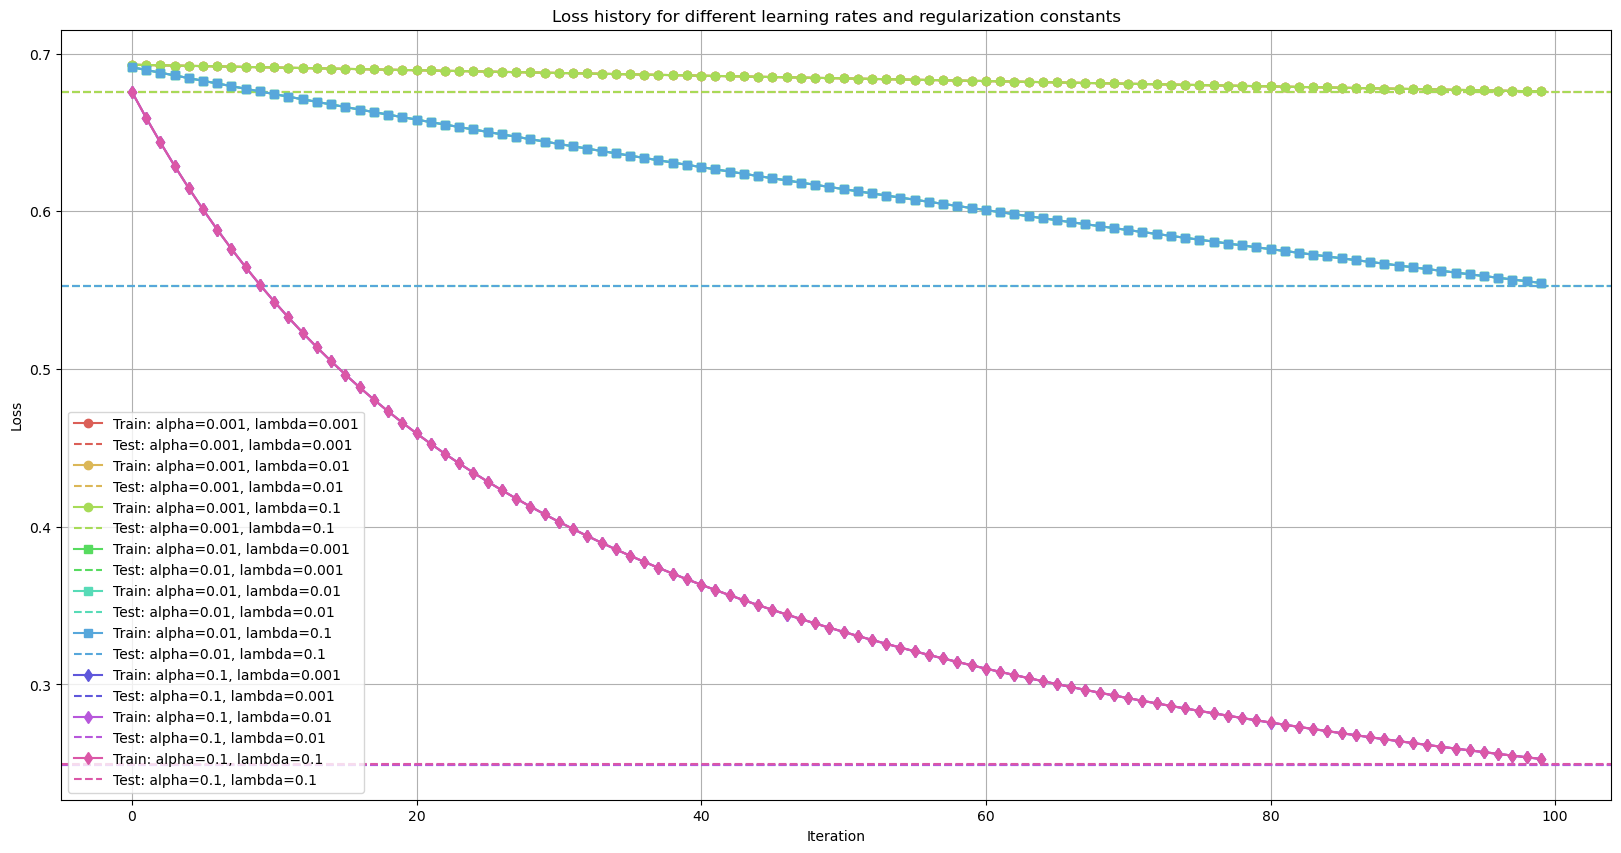

In [72]:
import seaborn as sns

learning_rates = [0.001, 0.01, 0.1]
reg_constants = [0.001, 0.01, 0.1]

palette = sns.color_palette("hls", len(learning_rates) * len(reg_constants))

plt.figure(figsize=(20, 10))

markers = ['o', 's', 'd']

color_index = 0
for i, alpha in enumerate(learning_rates):
        for j, regLambda in enumerate(reg_constants):
                theta, loss_history_train = fit(X_train, Y_train, regLambda, alpha)
                Y_pred = predict(X_test, theta)
                loss_test = computeCost(theta, X_test, Y_test, regLambda)
        
                plt.plot(loss_history_train, color=palette[color_index], marker=markers[i], 
                linestyle='-', label=f'Train: alpha={alpha}, lambda={regLambda}')
                plt.axhline(y=loss_test, color=palette[color_index], linestyle='--', 
                label=f'Test: alpha={alpha}, lambda={regLambda}')
        
                color_index += 1

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss history for different learning rates and regularization constants')
plt.legend()
plt.grid(True)
plt.show()

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:
Accuracy: 0.923


In [74]:
### START CODE HERE ###
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
### END CODE HERE ###

Accuracy: 0.923


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: Accuracy: 0.965

In [75]:
### START CODE HERE ###
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
### END CODE HERE ###

Accuracy: 0.965


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: by comparing the result accuracies for different methods we can see that the highest accuracy is for LDA (Linear Discriminant Analysis) with 0.965 so this will be the best method